<b>Case description</b>: \
This is your first day as a data scientist at one of the world’s largest retail companies. Already on your first day, 
you are invited to a meeting with important business stakeholders from the online payment department, who ask 
for your help: Over the past year they have encountered a high failure rate of online credit card payments. The 
company loses a lot of money due to failed transactions and customers become increasingly unsatisfied with the 
online shop. \
Such online credit card payments are performed via so-called payment service providers, referred to as “PSPs” 
by the business stakeholders. Your company has contracts with four different PSPs and pays transaction fees for 
every single payment. \
The current routing logic is manual and rule-based. Business decision-makers, however, hope that with predictive 
modelling and with your help, a smarter way of routing a PSP to a transaction is possible.

<b>Project Aim</b>: \
Help the business to automate the credit card routing via a predictive model. Such a model should increase the 
payment success rate by finding the best possible PSP for each transaction and at the same time keep the 
transaction fees low

● Structure the project via the CRISP-DM or Team DS methodologies and give a recommendation of how a git 
repository for the project could look like. Note that you do not have to structure your final code according to 
your git-repository proposal.\
● Assess the quality of the provided data set. Prepare and visualize your findings of the initial data analysis 
in order that business stakeholders can understand them in a clear and easy way. \
● Provide a baseline model as well as an accurate predictive model, which fulfills business requirements, 
i.e. increase credit card success rate and keep fees low. \
● In order that the business places confidence in your model, discuss the importance of the individual features 
and make the results of the model interpretable. Moreover, a sophisticated error analysis is very important 
for the business to understand the drawbacks of your approach. \
● In the last step of the project, give a proposal of how your model could be used by the business in everyday 
work, for instance, via a graphical user interface (GUI).\
● Finally, do not forget to attach the code to the final submission document.\

<b>Column Description</b>: \
• tmsp: timestamp of transaction \
• country: country of transaction \
• amount: transaction amount \
• success: is 1 if payment is successful \
• PSP: name of payments service provider \
• 3D_secured: is 1 if customer is 3D identified (i.e. more secure online credit card payments) \
• card: credit card provider (Master, Visa, Diners) \

<b>Additional Info from Business Side</b>: \
Many transactions fail at the first try. Therefore, customers try several times to transfer the money. If two 
transactions are within one minute, with the same amount of money and from the same country, it is (for a decent number of tries) safe to assume that they are payment attempts of the same purchase. Consider this possibility of several payment attempts of the same purchase in your machine learning model



In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('PSP_Jan_Feb_2019.csv')

In [3]:
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [4]:
data.shape

(50410, 7)

In [5]:
data.describe()

,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000
mean,202.395715,0.202896,0.238266
std,96.274730,0.402160,0.426027
min,6.000000,0.000000,0.000000
25%,133.000000,0.000000,0.000000
50%,201.000000,0.000000,0.000000
75%,269.000000,0.000000,0.000000
max,630.000000,1.000000,1.000000


In [6]:
data['tmsp'] = pd.to_datetime(data['tmsp'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.7+ MB


In [8]:
data.isnull().sum()

tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

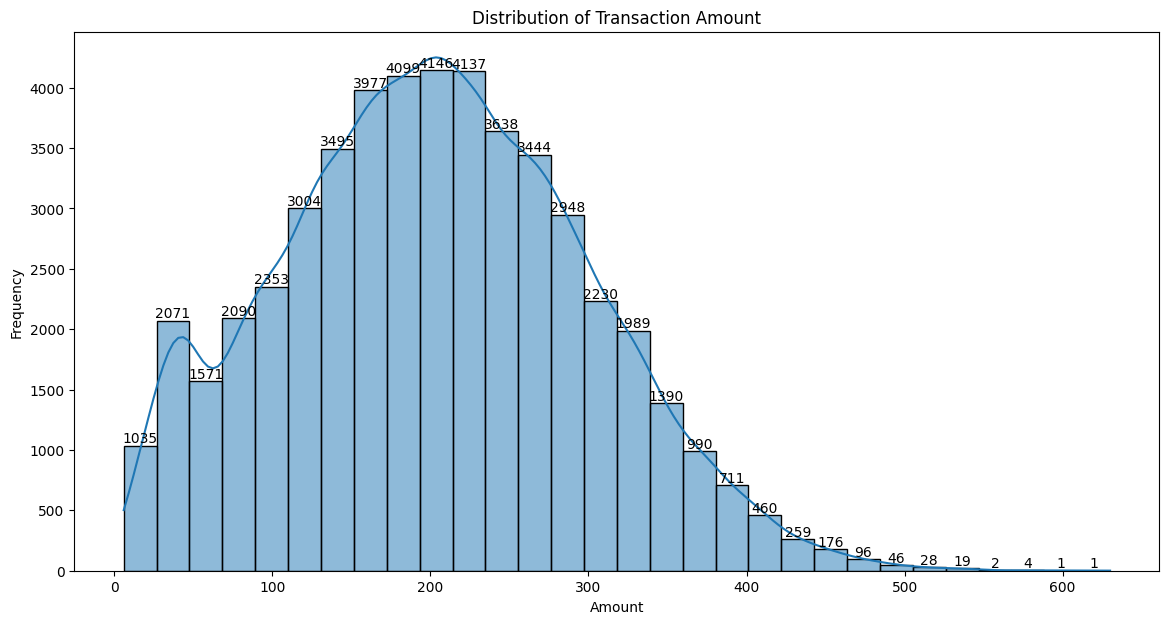

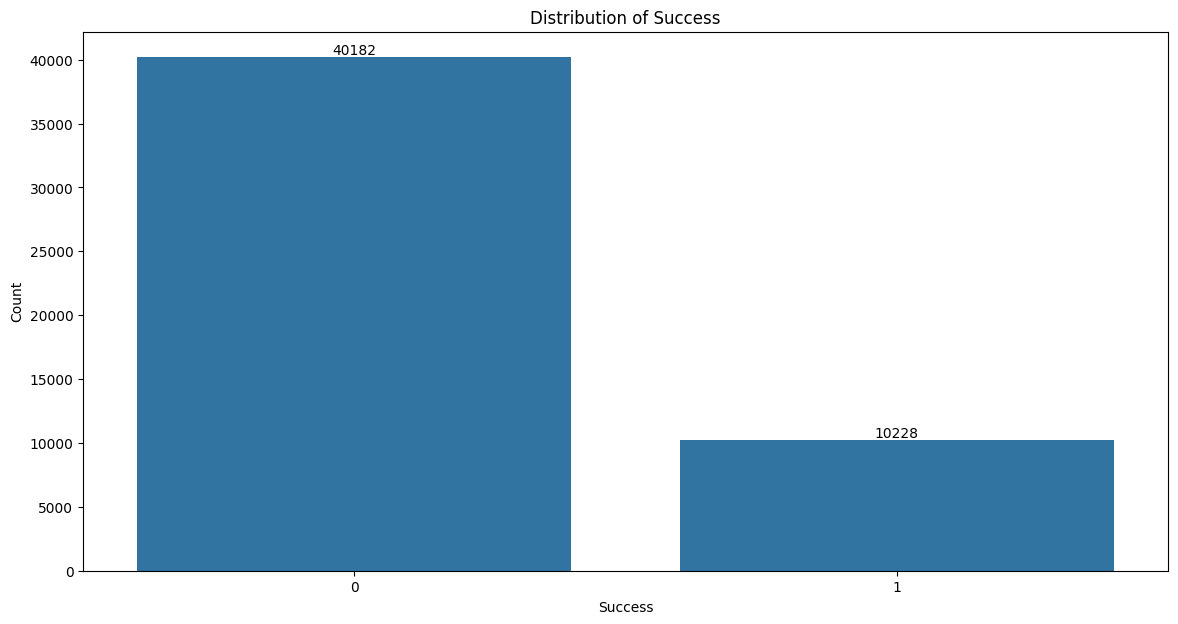

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# # Plot distribution of 'amount'
# plt.figure(figsize=(10, 6))
# sns.histplot(data['amount'], kde=True)
# plt.title('Distribution of Amount')
# plt.xlabel('Amount')
# plt.ylabel('Frequency')
# plt.show()

# # Plot distribution of 'success'
# plt.figure(figsize=(10, 6))
# sns.countplot(x='success', data=data)
# plt.title('Distribution of Success')
# plt.xlabel('Success')
# plt.ylabel('Count')
# plt.show()


# Plot the distribution of 'amount' and 'success' columns and print the numbers on the graph

# Plot the distribution of 'amount'
plt.figure(figsize=(14, 7))
ax = sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Annotate the histogram with the count of each bin
for p in ax.patches:
    height = p.get_height()
    plt.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plot the distribution of 'success'
plt.figure(figsize=(14, 7))
ax = sns.countplot(x='success', data=data)
plt.title('Distribution of Success')
plt.xlabel('Success')
plt.ylabel('Count')

# Annotate the count plot with the count of each category
for p in ax.patches:
    height = p.get_height()
    plt.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

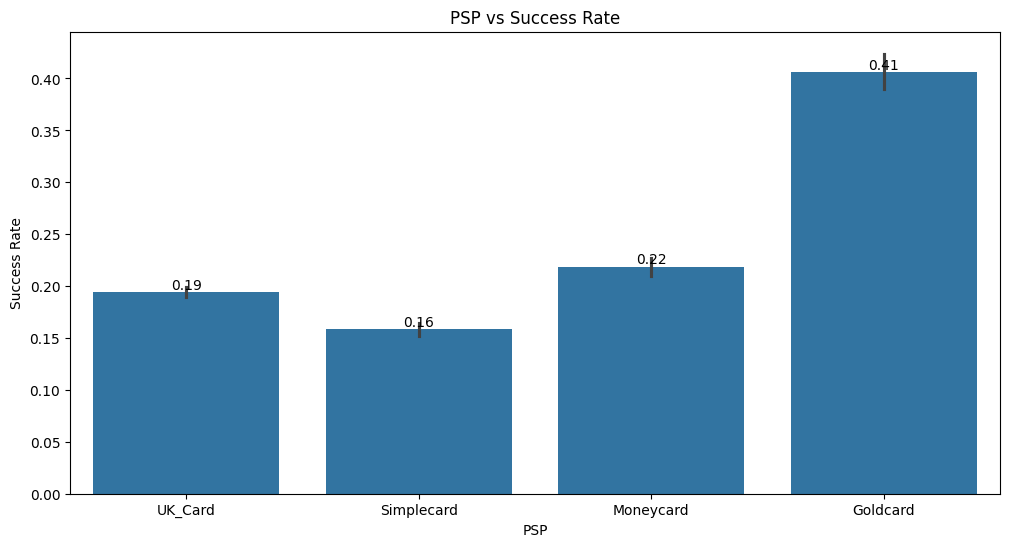

In [12]:
# Plot PSP vs success rate and print the value on the graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='PSP', y='success', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('PSP vs Success Rate')
plt.xlabel('PSP')
plt.ylabel('Success Rate')

# Annotate the bar plot with the success rate of each PSP
for p in ax.patches:
    height = p.get_height()
    plt.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

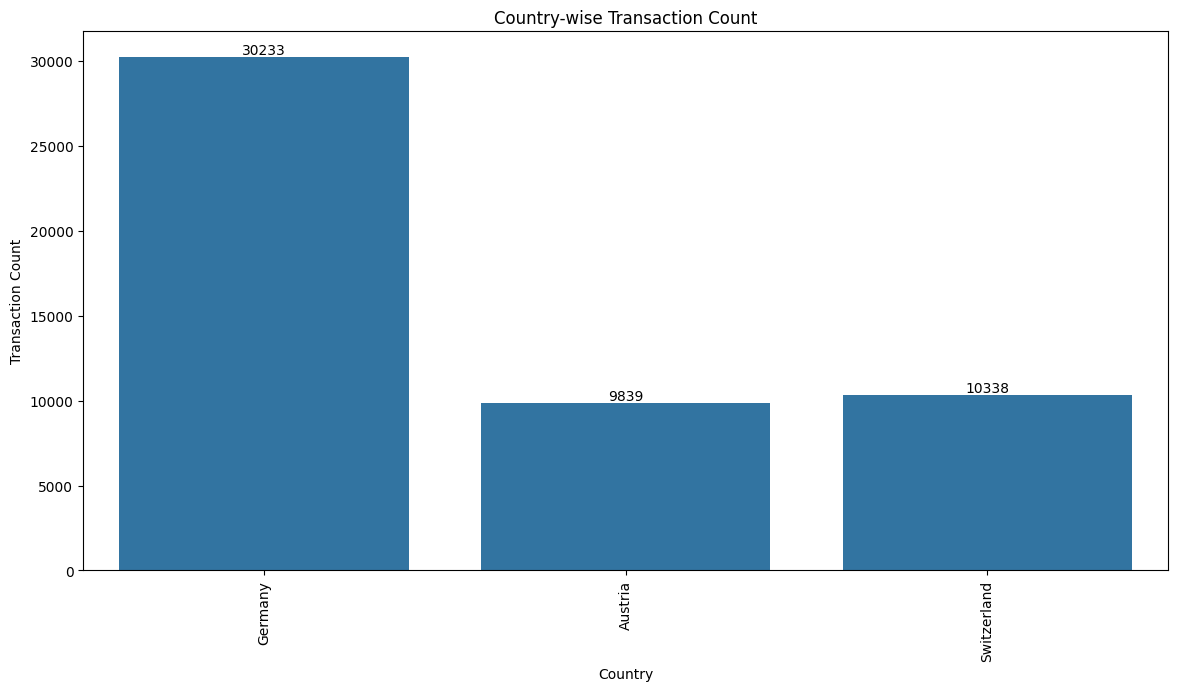

In [13]:
# Plot country-wise transaction count and print the numbers on the graph
plt.figure(figsize=(14, 7))
ax = sns.countplot(x='country', data=data)
plt.title('Country-wise Transaction Count')
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.xticks(rotation=90)

# Annotate the count plot with the count of each country
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

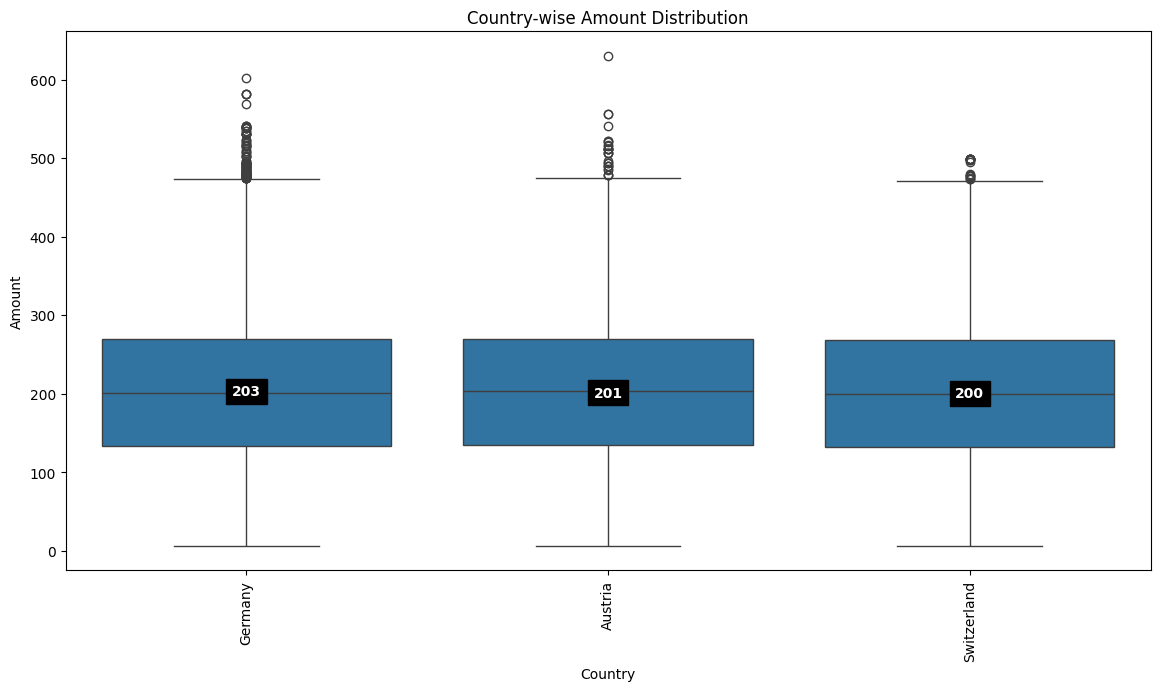

In [14]:
# Plot country-wise amount distribution and print the values on the graph
plt.figure(figsize=(14, 7))
ax = sns.boxplot(x='country', y='amount', data=data)
plt.title('Country-wise Amount Distribution')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.xticks(rotation=90)

# Annotate the box plot with the median value of each country
medians = data.groupby(['country'])['amount'].median().values
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.0f}', ha='center', va='center', fontweight='bold', color='white', bbox=dict(facecolor='black'))

plt.show()

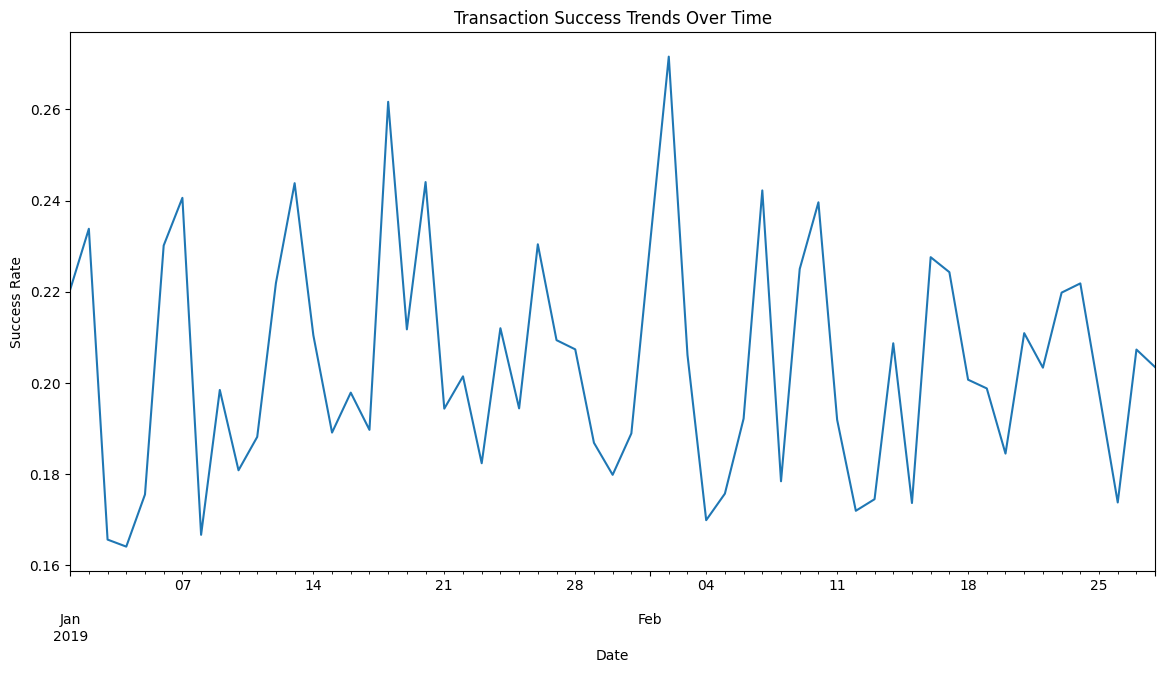

In [15]:
# Plot Transaction success trends over time
plt.figure(figsize=(14, 7))
data.set_index('tmsp').resample('D')['success'].mean().plot()
plt.title('Transaction Success Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Success Rate')
plt.show()

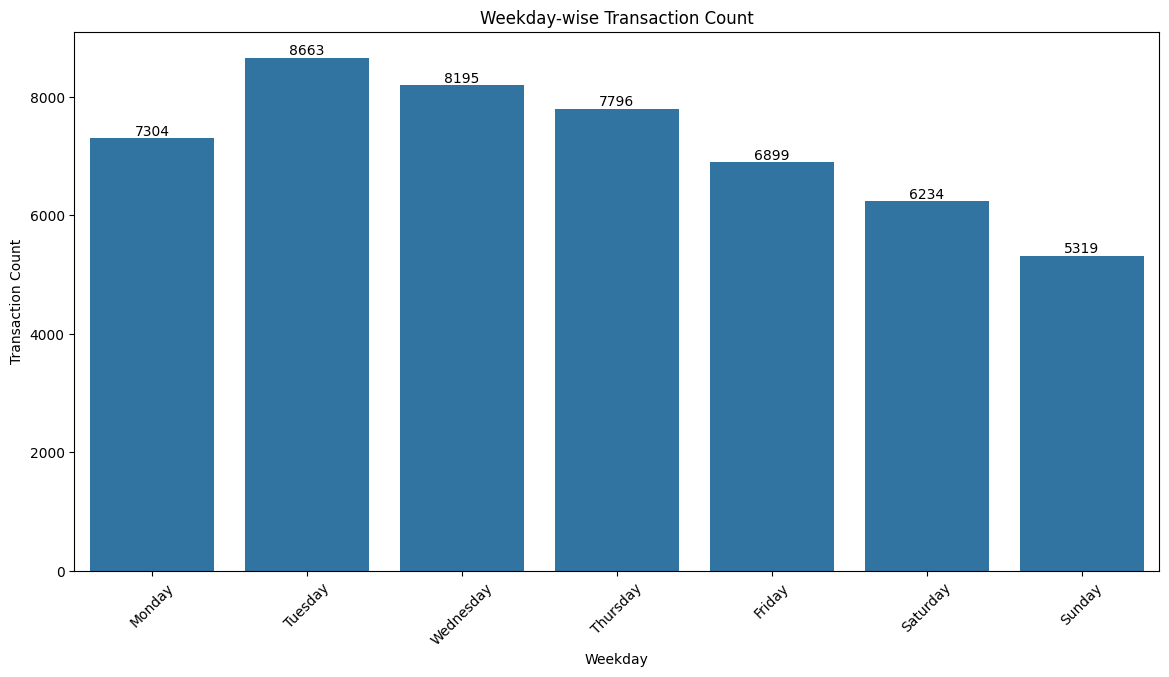

In [18]:
# Plot weekday-wise transaction count and print the numbers on the graph
data['weekday'] = data['tmsp'].dt.day_name()

plt.figure(figsize=(14, 7))
ax = sns.countplot(x='weekday', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekday-wise Transaction Count')
plt.xlabel('Weekday')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)

# Annotate the count plot with the count of each weekday
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

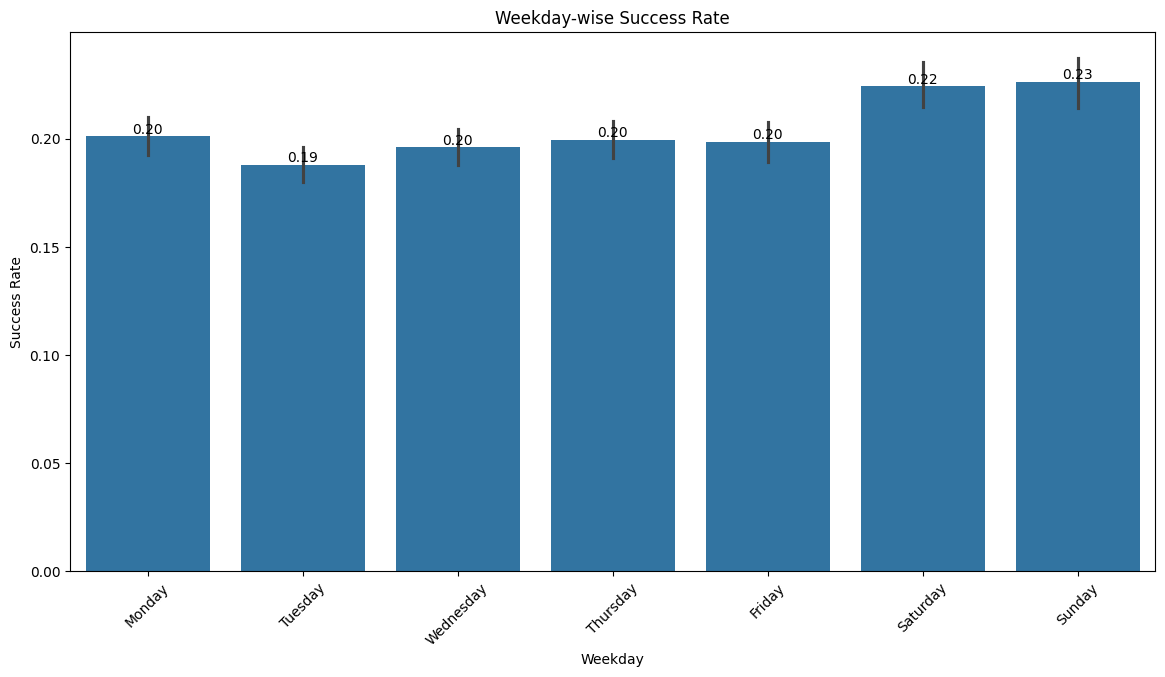

In [19]:
# Plot weekday-wise success rate and print the numbers on the graph
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='weekday', y='success', data=data, estimator=lambda x: sum(x==1) / len(x), order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekday-wise Success Rate')
plt.xlabel('Weekday')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)

# Annotate the bar plot with the success rate of each weekday
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

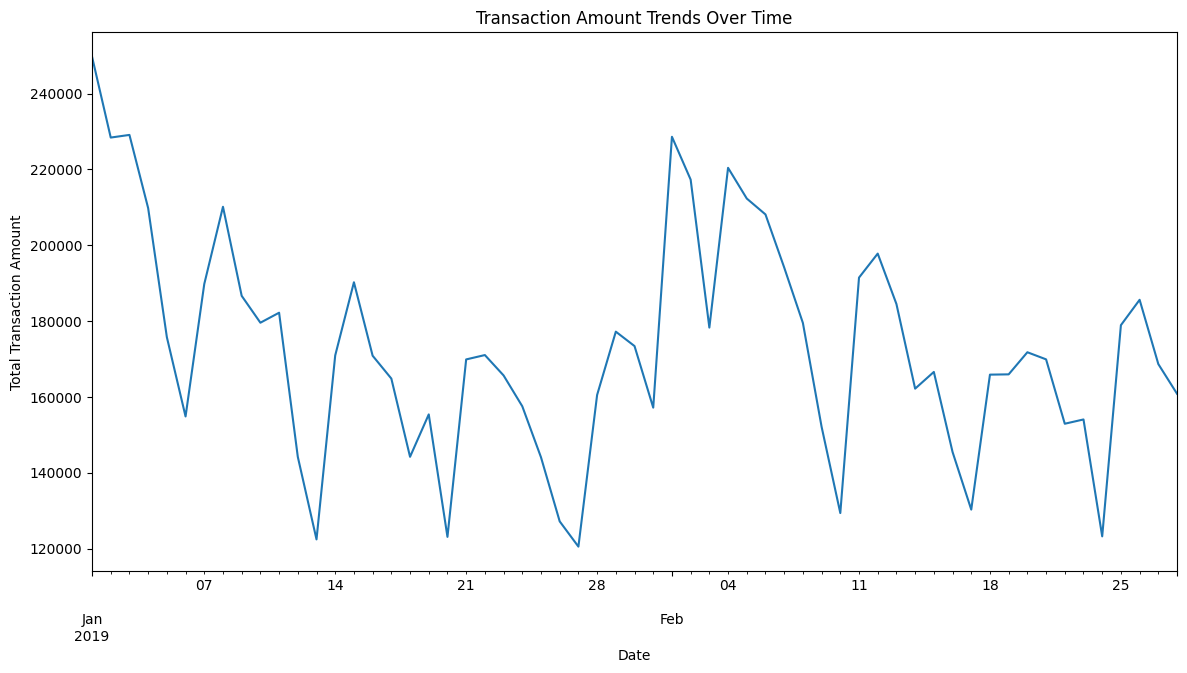

In [20]:
# Plot Transaction amount trends over time
plt.figure(figsize=(14, 7))
data.set_index('tmsp').resample('D')['amount'].sum().plot()
plt.title('Transaction Amount Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.show()

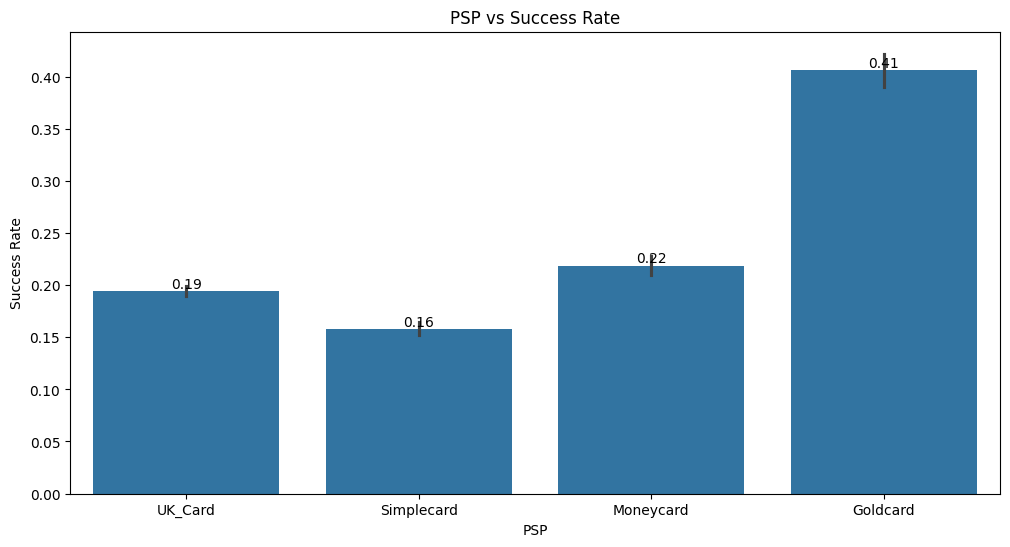

In [21]:
# Plot PSP vs success rate and print the value on the graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='PSP', y='success', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('PSP vs Success Rate')
plt.xlabel('PSP')
plt.ylabel('Success Rate')

# Annotate the bar plot with the success rate of each PSP
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

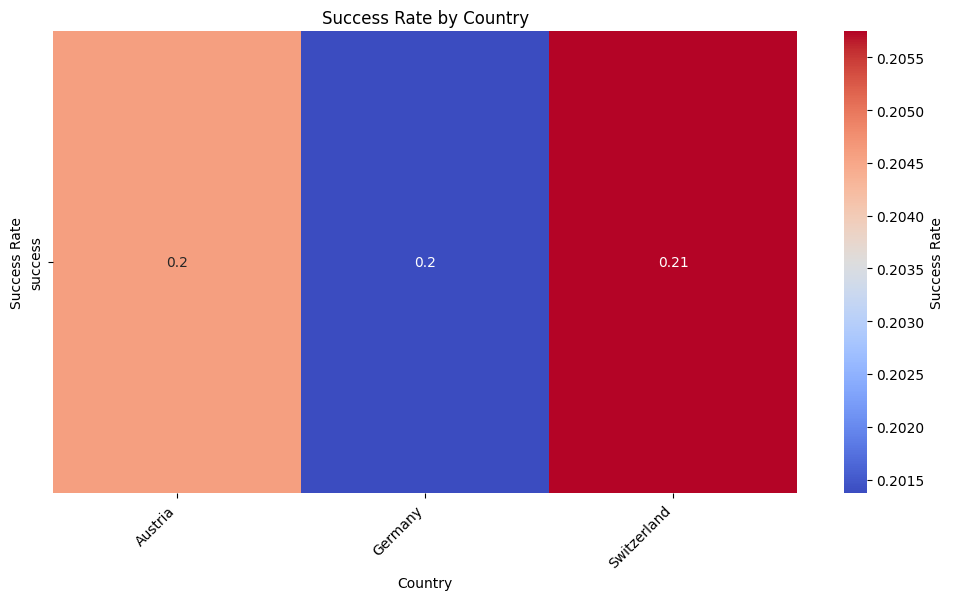

In [14]:
country_success_rate = data.groupby('country')['success'].mean().reset_index()

# Pivot the table with countries on one axis and success rate as the value
# Heatmaps require a 2D structure, so here we just plot country vs success rate
plt.figure(figsize=(12, 6))
sns.heatmap(country_success_rate.set_index('country').T, annot=True, cmap='coolwarm', cbar_kws={'label': 'Success Rate'})

# Adjust the plot
plt.title('Success Rate by Country')
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [28]:
# Create a new feature 'high_amount' to indicate if the transaction amount is above a certain threshold (e.g., 200)
data['high_amount'] = data['amount'] > 200

# Create a new feature 'hour' to extract the hour of the day from the timestamp
data['hour'] = data['tmsp'].dt.hour

# Display the first few rows to verify the new features
# data.head()
# Create a new feature 'is_weekend' to indicate if the transaction occurred on a weekend
data['is_weekend'] = data['tmsp'].dt.weekday >= 5

# Calculate the success rate for each country
country_success_rate = data.groupby('country')['success'].mean().reset_index()

# Create a new feature 'is_high_success_country' to indicate if the transaction is from a high success rate country
high_success_countries = country_success_rate[country_success_rate['success'] > 0.2]['country']
data['is_high_success_country'] = data['country'].isin(high_success_countries)

# Display the first few rows to verify the new features
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,week,weekday,high_amount,hour,is_weekend,transaction_hour,amount_category,is_high_success_country
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Medium,True
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Medium,True
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High,True
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High,True
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,Tuesday,False,0,False,Midnight,Medium,True


In [23]:
# Create a new feature 'transaction_hour' to categorize transactions into different time periods of the day
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data['transaction_hour'] = data['hour'].apply(categorize_hour)

# Create a new feature 'amount_category' to categorize transaction amounts into different ranges
def categorize_amount(amount):
    if amount < 50:
        return 'Low'
    elif 50 <= amount < 200:
        return 'Medium'
    else:
        return 'High'

data['amount_category'] = data['amount'].apply(categorize_amount)

# Display the first few rows to verify the new features
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,week,weekday,high_amount,hour,is_weekend,transaction_hour,amount_category
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Medium
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Medium
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,Tuesday,False,0,False,Midnight,Medium


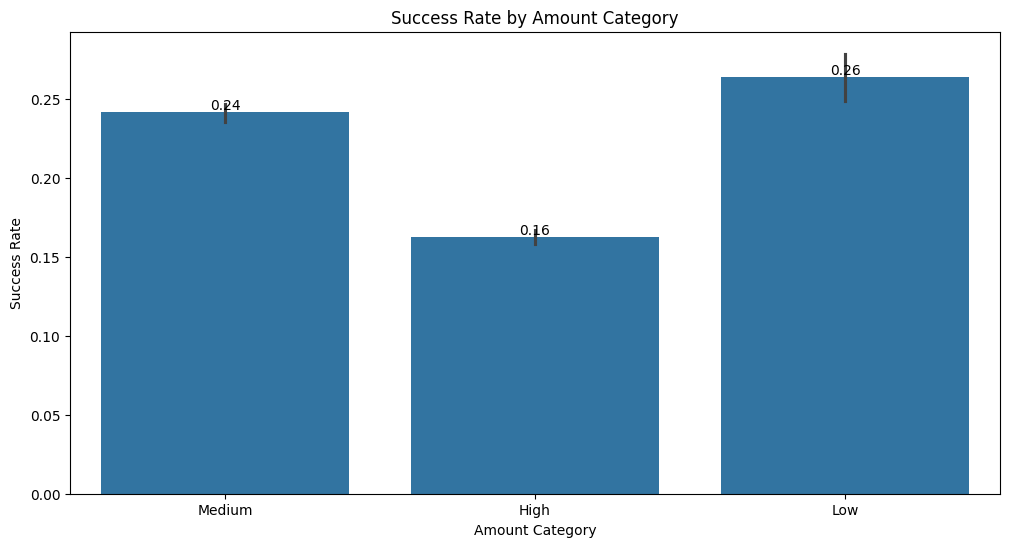

In [24]:
# Plot success rate by amount category and annotate the numbers on the graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='amount_category', y='success', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('Success Rate by Amount Category')
plt.xlabel('Amount Category')
plt.ylabel('Success Rate')

# Annotate the bar plot with the success rate of each amount category
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

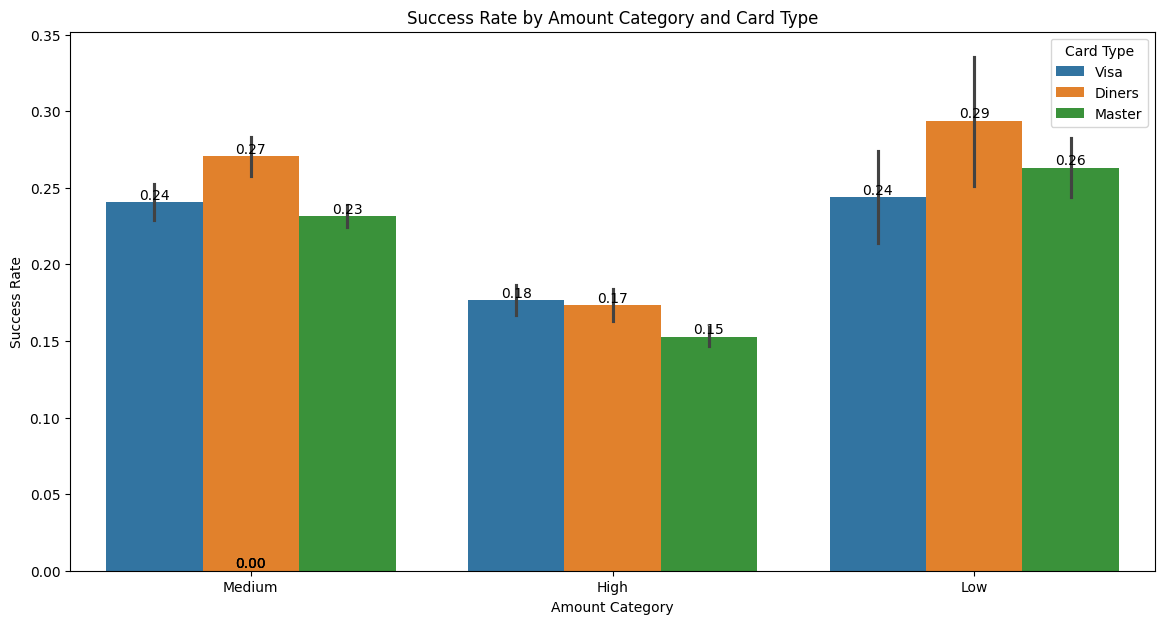

In [25]:
# Group by card and plot the success rate with respect to amount category and print the numbers on the graph
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='amount_category', y='success', hue='card', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('Success Rate by Amount Category and Card Type')
plt.xlabel('Amount Category')
plt.ylabel('Success Rate')
plt.legend(title='Card Type')

# Annotate the bar plot with the success rate of each amount category and card type
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

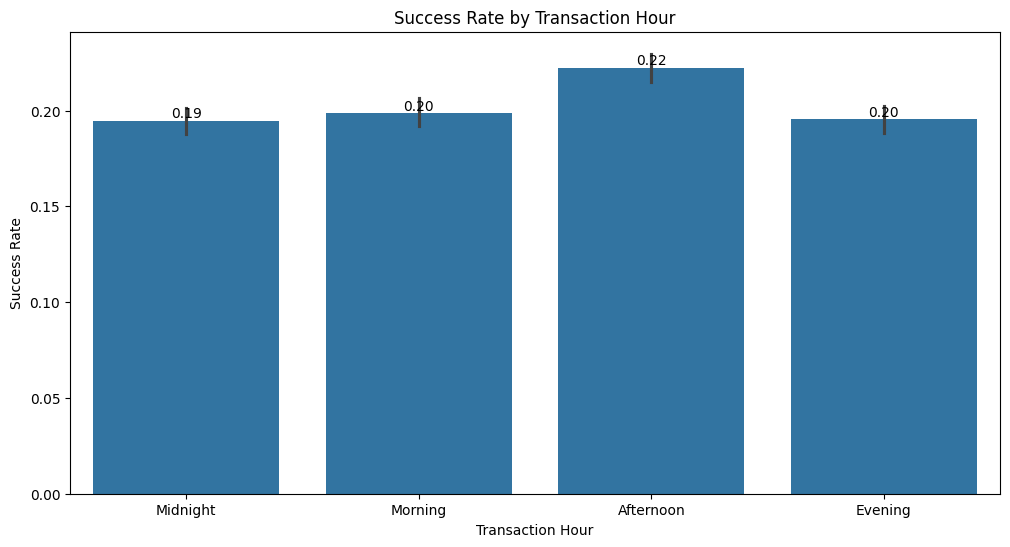

In [26]:
# Plot success rate by transaction hour and annotate the numbers on the graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='transaction_hour', y='success', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('Success Rate by Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Success Rate')

# Annotate the bar plot with the success rate of each transaction hour
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

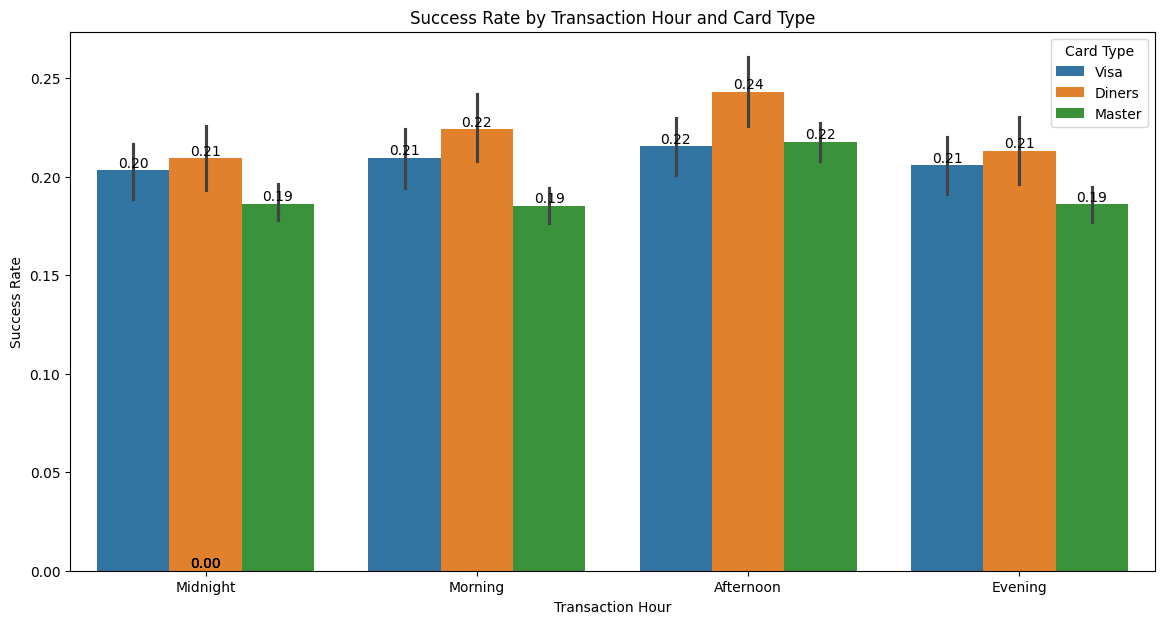

In [27]:
# Plot success rate with respect to transaction hour and card type and print the numbers on the graph
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='transaction_hour', y='success', hue='card', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('Success Rate by Transaction Hour and Card Type')
plt.xlabel('Transaction Hour')
plt.ylabel('Success Rate')
plt.legend(title='Card Type')

# Annotate the bar plot with the success rate of each transaction hour and card type
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

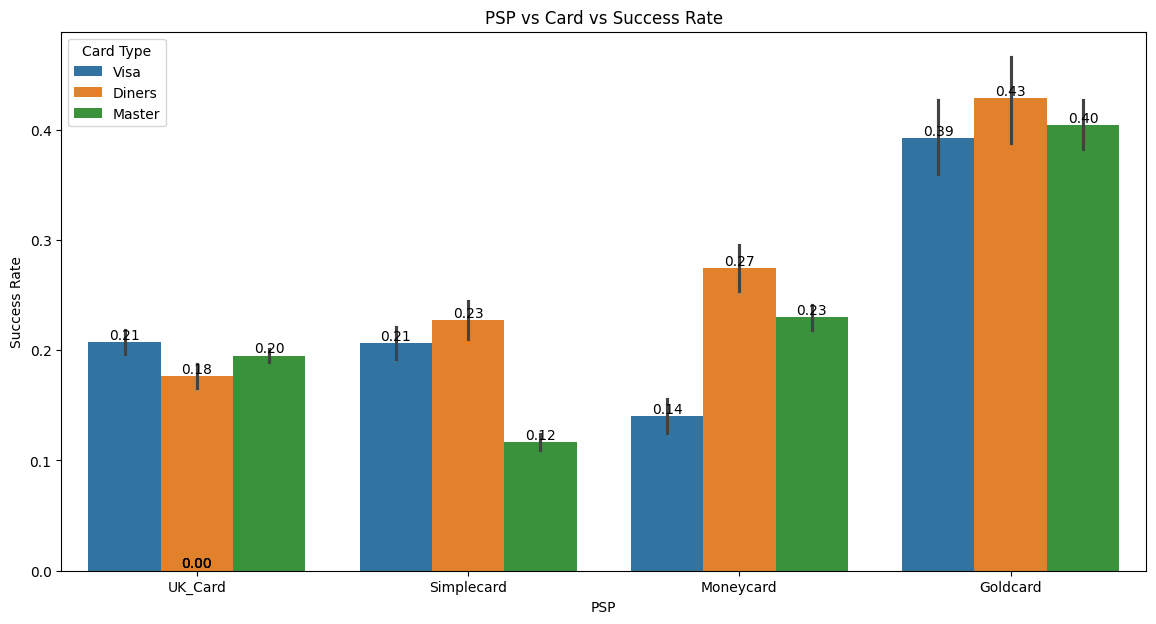

In [29]:
# Plot PSP vs card vs success rate and print the numbers on the graph
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='PSP', y='success', hue='card', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('PSP vs Card vs Success Rate')
plt.xlabel('PSP')
plt.ylabel('Success Rate')
plt.legend(title='Card Type')

# Annotate the bar plot with the success rate of each PSP and card type
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<Figure size 1400x700 with 0 Axes>

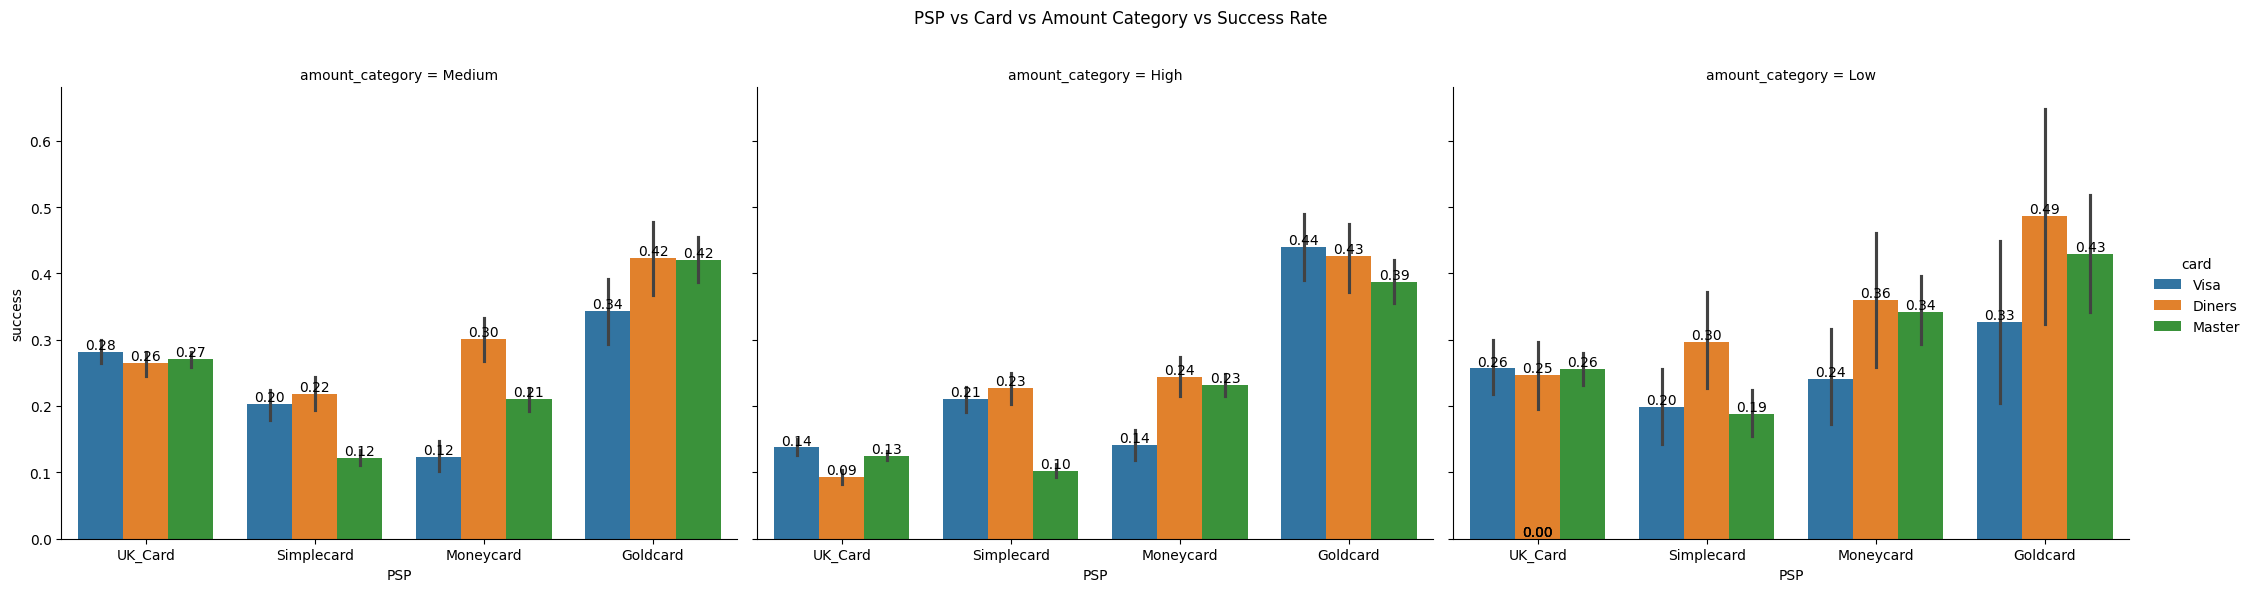

In [30]:
# Plot PSP vs Card vs Amount Category vs Success Rate and print the numbers on the graph
plt.figure(figsize=(14, 7))
g = sns.catplot(x='PSP', y='success', hue='card', col='amount_category', data=data, kind='bar', estimator=lambda x: sum(x==1) / len(x), height=6, aspect=1.2)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('PSP vs Card vs Amount Category vs Success Rate')

# Annotate the bar plot with the success rate of each PSP, card type, and amount category
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<Figure size 1400x700 with 0 Axes>

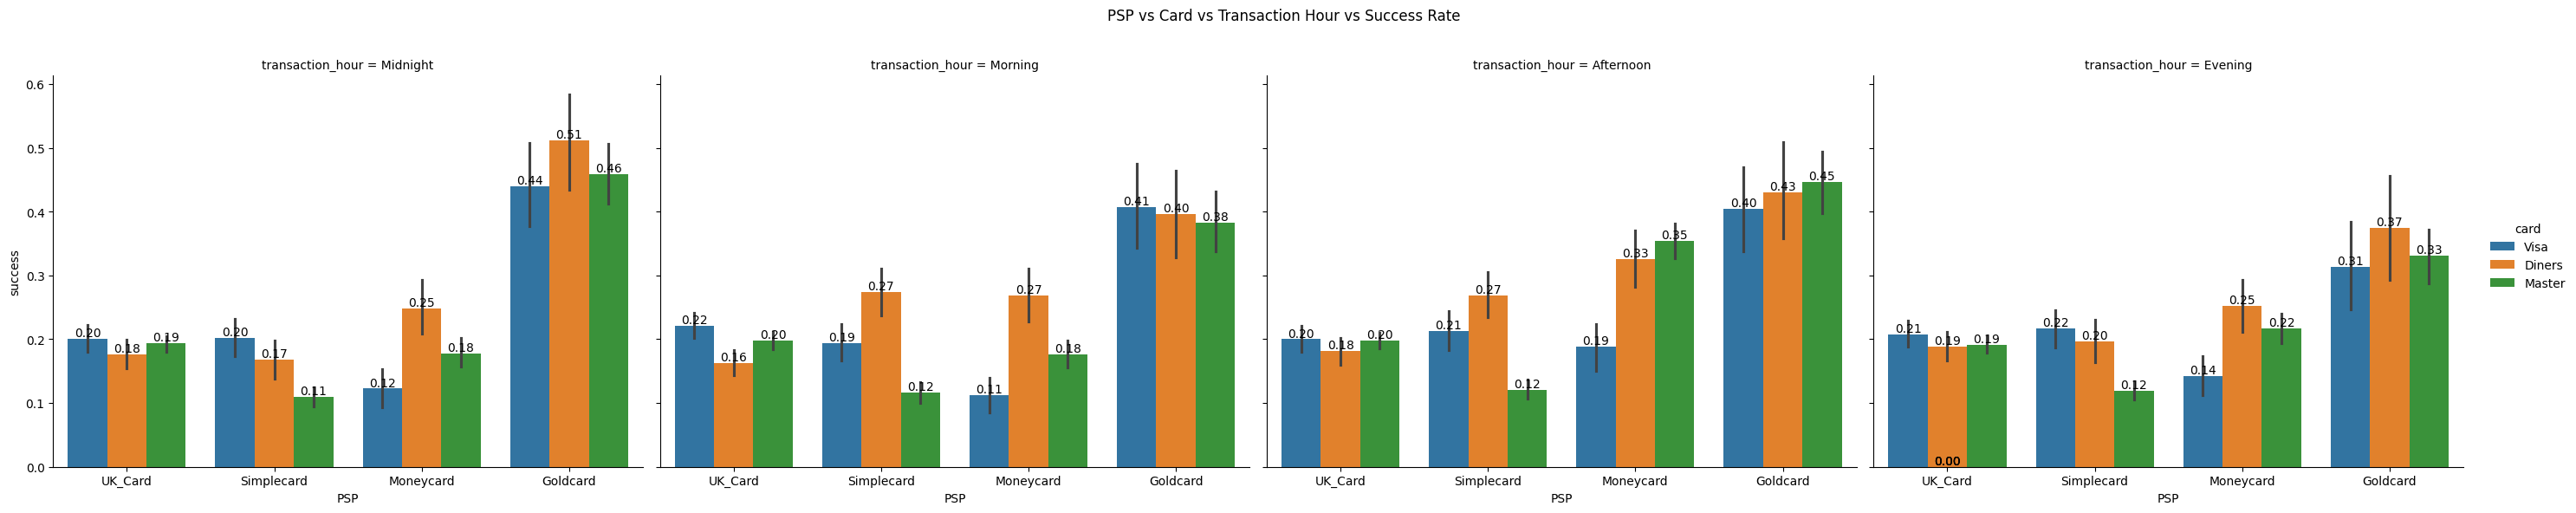

In [31]:
# Plot PSP vs Card vs Transaction Hour vs Success Rate and print the numbers on the graph
plt.figure(figsize=(14, 7))
g = sns.catplot(x='PSP', y='success', hue='card', col='transaction_hour', data=data, kind='bar', estimator=lambda x: sum(x==1) / len(x), height=6, aspect=1.2)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('PSP vs Card vs Transaction Hour vs Success Rate')

# Annotate the bar plot with the success rate of each PSP, card type, and transaction hour
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

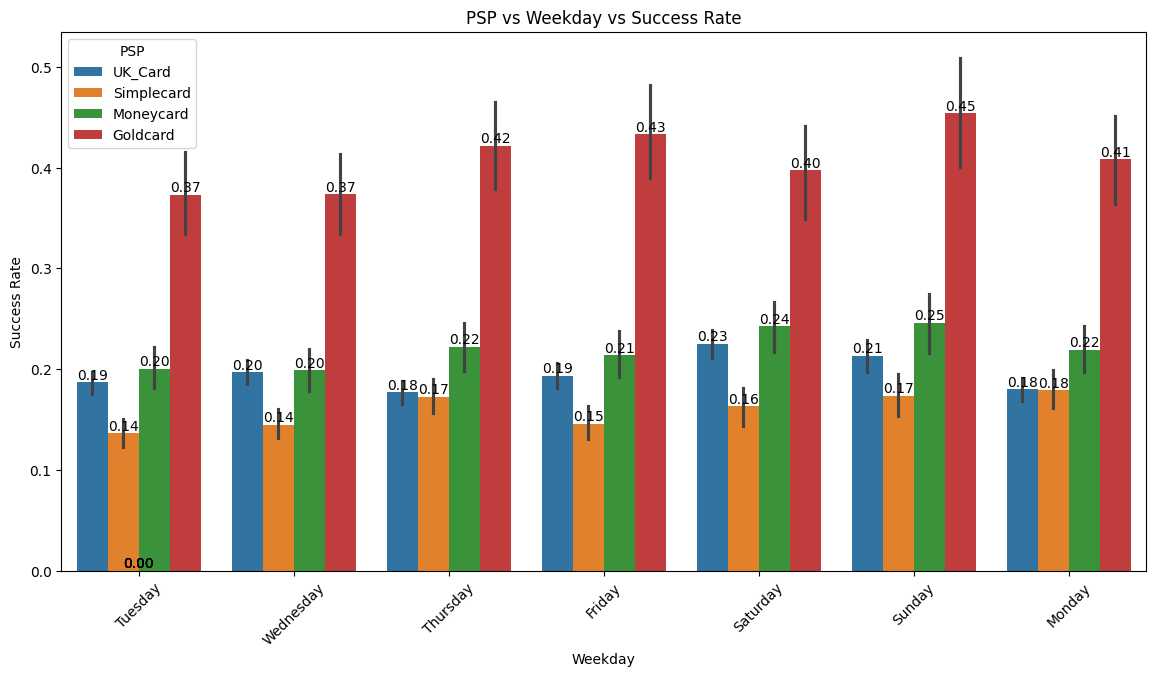

In [32]:
# Plot PSP vs Weekday vs Success Rate and print the numbers on the graph
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='weekday', y='success', hue='PSP', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('PSP vs Weekday vs Success Rate')
plt.xlabel('Weekday')
plt.ylabel('Success Rate')
plt.legend(title='PSP')
plt.xticks(rotation=45)

# Annotate the bar plot with the success rate of each PSP and weekday
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [33]:
# Create a new feature 'transaction_hour' to categorize transactions into different time periods of the day
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data['transaction_hour'] = data['hour'].apply(categorize_hour)

# Create a new feature 'amount_category' to categorize transaction amounts into different ranges
def categorize_amount(amount):
    if amount < 133:
        return 'Low'
    elif 133 <= amount < 201:
        return 'Medium'
    else:
        return 'High'

data['amount_category'] = data['amount'].apply(categorize_amount)

# Display the first few rows to verify the new features
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,week,weekday,high_amount,hour,is_weekend,transaction_hour,amount_category,is_high_success_country
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Low,True
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Low,True
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High,True
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High,True
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,Tuesday,False,0,False,Midnight,Low,True


In [34]:
data.shape

(50410, 15)

In [35]:
data[data['is_weekend']==True].shape

(11553, 15)

In [36]:
data.amount.describe()

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64

In [ ]:
# # Define the function to categorize transaction amounts based on the given percentiles
# def categorize_amount(amount):
#     if amount < 133:
#         return 'Low'
#     elif 133 <= amount < 201:
#         return 'Medium'
#     else:
#         return 'High'

# # Apply the function to the 'amount' column to create a new feature 'amount_category'
# data['amount_category'] = data['amount'].apply(categorize_amount)

# # Display the first few rows to verify the new feature
# data.head()

In [37]:
from math import ceil
# Create a new feature 'week_of_month' to extract the week number of the month from the timestamp
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(ceil(adjusted_dom/7.0))

data['week_of_month'] = data['tmsp'].apply(week_of_month)

# Display the first few rows to verify the new feature
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,week,weekday,high_amount,hour,is_weekend,transaction_hour,amount_category,is_high_success_country,week_of_month
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Low,True,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1,Tuesday,False,0,False,Midnight,Low,True,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High,True,1
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1,Tuesday,True,0,False,Midnight,High,True,1
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1,Tuesday,False,0,False,Midnight,Low,True,1


In [38]:
data['week_of_month'].value_counts()

week_of_month
2    12503
3    11320
4    10659
1     9236
5     6692
Name: count, dtype: int64

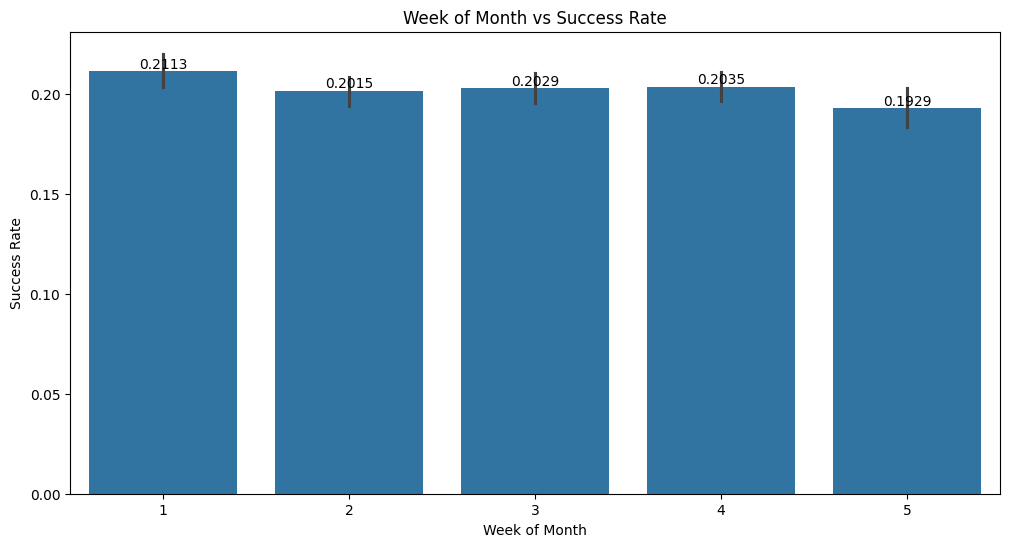

In [40]:
# Plot week of month vs success rate and print the numbers on the graph
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='week_of_month', y='success', data=data, estimator=lambda x: sum(x==1) / len(x))
plt.title('Week of Month vs Success Rate')
plt.xlabel('Week of Month')
plt.ylabel('Success Rate')

# Annotate the bar plot with the success rate of each week of the month
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<Figure size 1400x700 with 0 Axes>

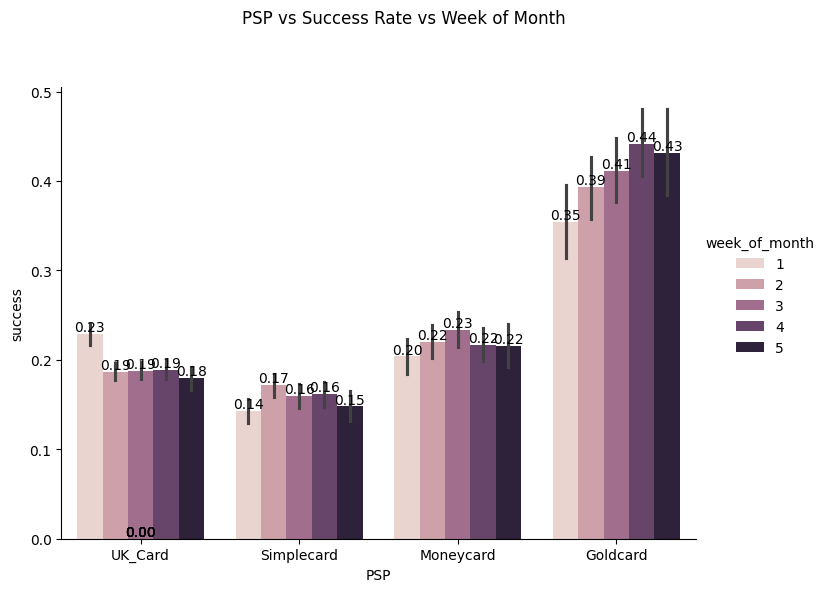

In [41]:
# Plot PSP vs Success Rate vs Week of Month and print the numbers on the graph
plt.figure(figsize=(14, 7))
g = sns.catplot(x='PSP', y='success', hue='week_of_month', data=data, kind='bar', estimator=lambda x: sum(x==1) / len(x), height=6, aspect=1.2)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('PSP vs Success Rate vs Week of Month')

# Annotate the bar plot with the success rate of each PSP and week of the month
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<Figure size 1400x700 with 0 Axes>

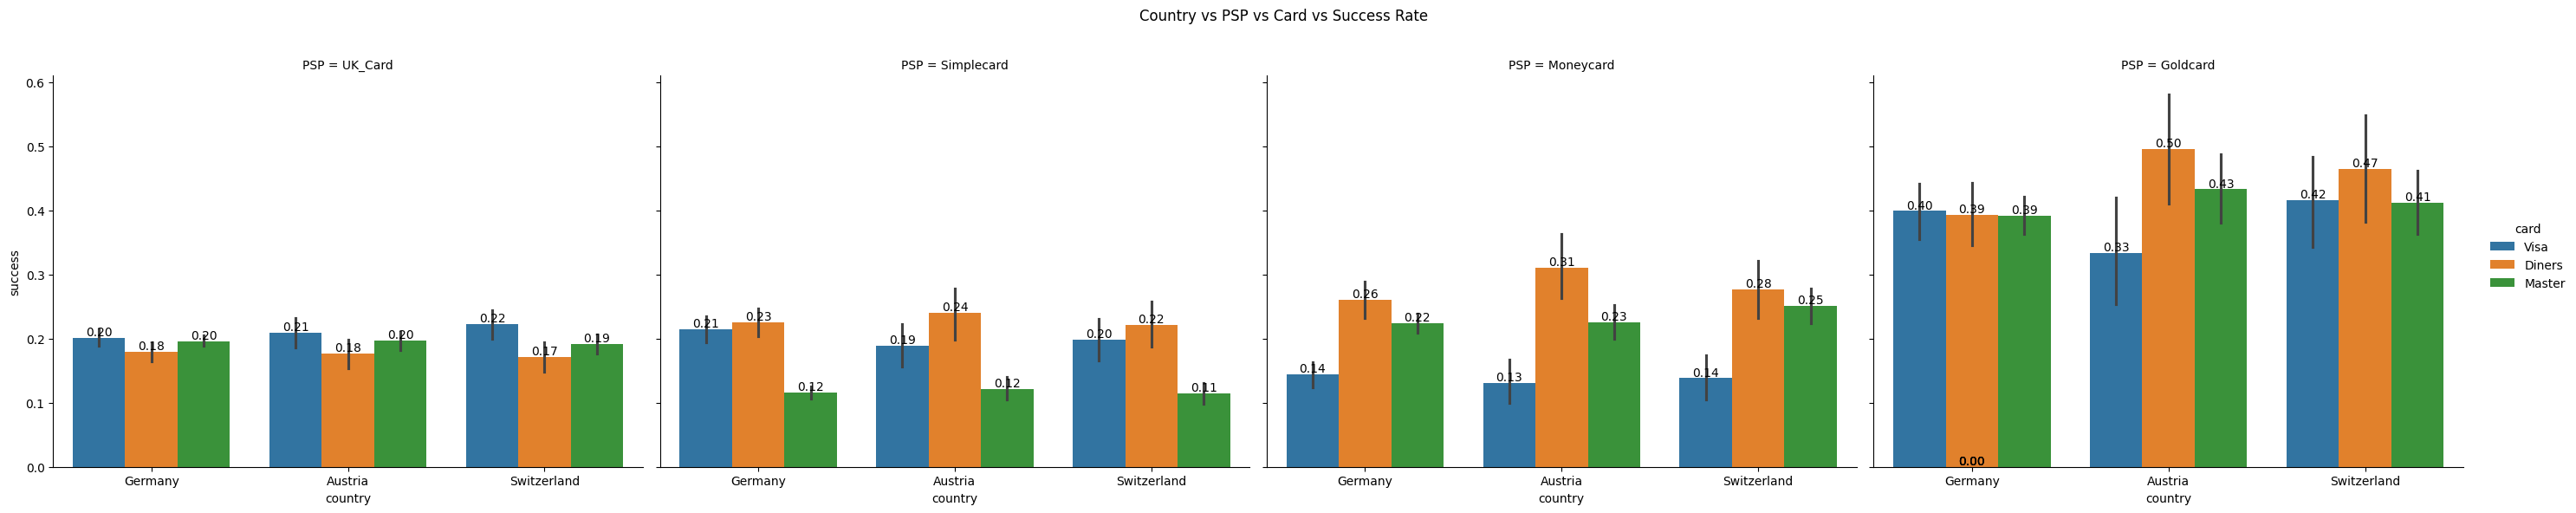

In [42]:
# Plot Country vs PSP vs Card vs Success Rate and print the numbers on the graph
plt.figure(figsize=(14, 7))
g = sns.catplot(x='country', y='success', hue='card', col='PSP', data=data, kind='bar', estimator=lambda x: sum(x==1) / len(x), height=6, aspect=1.2)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Country vs PSP vs Card vs Success Rate')

# Annotate the bar plot with the success rate of each country, PSP, and card type
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<Figure size 1400x700 with 0 Axes>

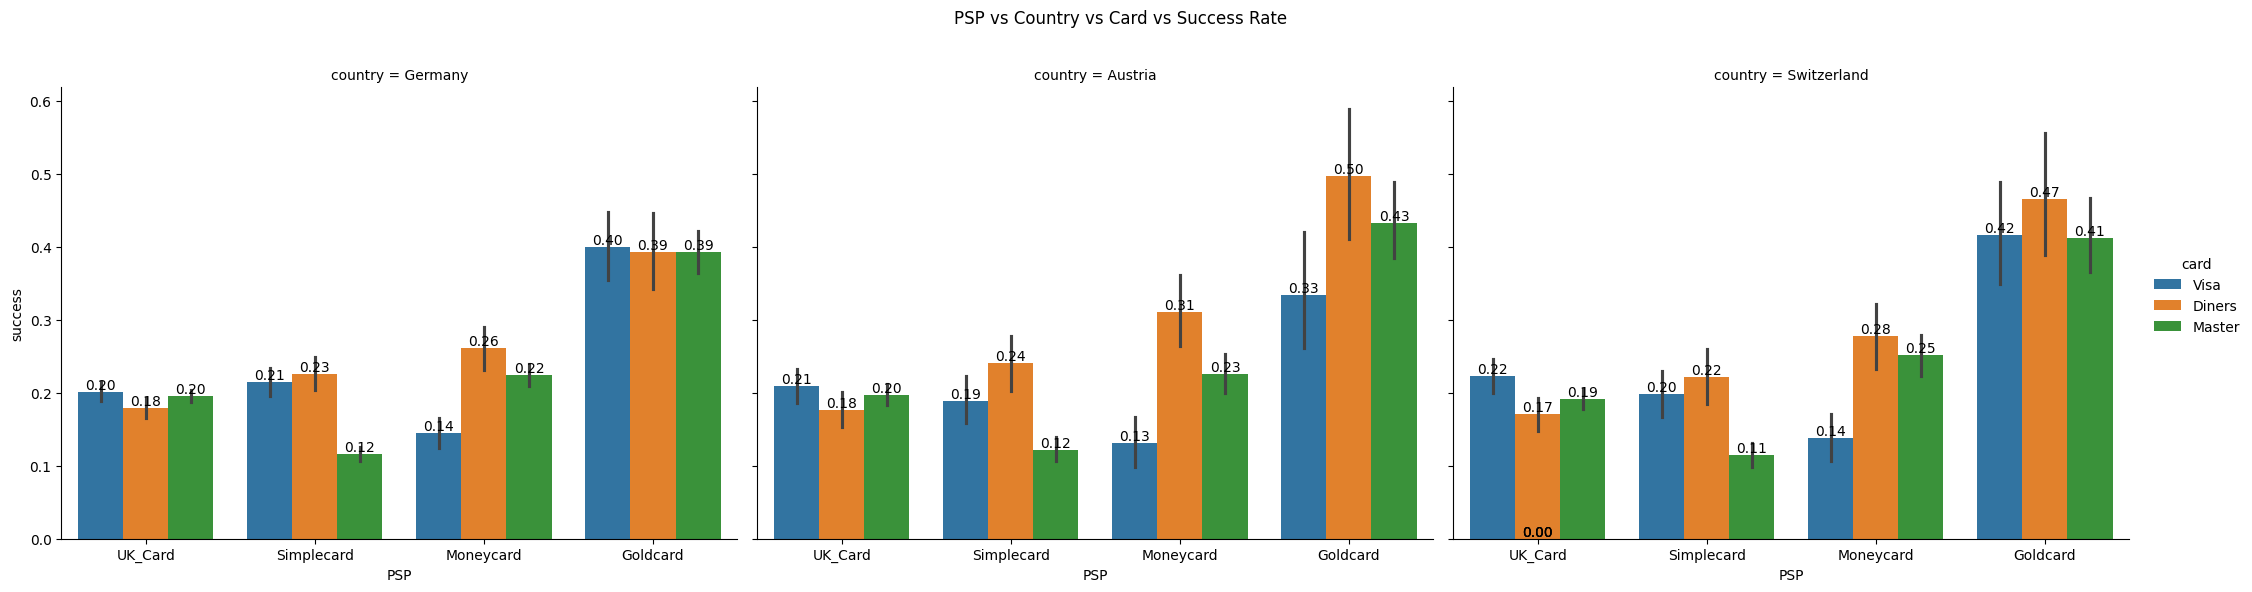

In [43]:
# Plot PSP vs Country vs Card vs Success Rate and print the numbers on the graph
plt.figure(figsize=(14, 7))
g = sns.catplot(x='PSP', y='success', hue='card', col='country', data=data, kind='bar', estimator=lambda x: sum(x==1) / len(x), height=6, aspect=1.2)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('PSP vs Country vs Card vs Success Rate')

# Annotate the bar plot with the success rate of each PSP, country, and card type
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import shap

# Define features and target
X = data.drop(columns=['success', 'tmsp'])
y = data['success']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameters for tuning
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

params = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Perform grid search with cross-validation
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"Evaluation metrics for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba)}")

    # SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Define features and target
X = data.drop(columns=['success', 'tmsp', 'amount'])
y = data['amount']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameters for tuning
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

params = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Perform grid search with cross-validation
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluation metrics for {model_name}:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")

    # SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

In [59]:
# Create a 'success_fee' column based on the conditions provided
def calculate_success_fee(row):
    if row['PSP'] == 'Moneycard' and row['success'] == 1:
        return 5
    elif row['PSP'] == 'Goldcard' and row['success'] == 1:
        return 10
    elif row['PSP'] == 'UK_Card' and row['success'] == 1:
        return 3
    elif row['PSP'] == 'Simplecard' and row['success'] == 1:
        return 1
    elif row['PSP'] == 'Moneycard' and row['success'] == 0:
        return 2
    elif row['PSP'] == 'Goldcard' and row['success'] == 0:
        return 5
    elif row['PSP'] == 'UK_Card' and row['success'] == 0:
        return 1
    elif row['PSP'] == 'Simplecard' and row['success'] == 0:
        return 0.5
    else:
        return 0

data['transaction_fee'] = data.apply(calculate_success_fee, axis=1)

# Display the first few rows to verify the new column
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,high_amount,hour,is_weekend,is_high_success_country,weekday,transaction_hour,amount_category,week_of_month,success_fee,fail_fee,transaction_fee
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,False,0,False,True,Tuesday,Midnight,Low,1,0,1.0,1.0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,False,0,False,True,Tuesday,Midnight,Low,1,3,0.0,3.0
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,True,0,False,True,Tuesday,Midnight,High,1,0,1.0,1.0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,True,0,False,True,Tuesday,Midnight,High,1,3,0.0,3.0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,False,0,False,True,Tuesday,Midnight,Low,1,0,0.5,0.5


In [61]:
data.head()

,tmsp,country,amount,success,PSP,3D_secured,card,high_amount,hour,is_weekend,is_high_success_country,weekday,transaction_hour,amount_category,week_of_month,transaction_fee
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,False,0,False,True,Tuesday,Midnight,Low,1,1.0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,False,0,False,True,Tuesday,Midnight,Low,1,3.0
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,True,0,False,True,Tuesday,Midnight,High,1,1.0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,True,0,False,True,Tuesday,Midnight,High,1,3.0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,False,0,False,True,Tuesday,Midnight,Low,1,0.5


In [60]:
data.drop(columns=['success_fee', 'fail_fee'], inplace=True)

In [56]:
data['success_fee'].unique(), data['PSP'].unique(), 

(array([ 0,  3,  5, 10,  1], dtype=int64),
 array(['UK_Card', 'Simplecard', 'Moneycard', 'Goldcard'], dtype=object))

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import shap

# Define features and target
X = data.drop(columns=['success', 'tmsp'])
y = data['success']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameters for tuning
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

params = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Perform grid search with cross-validation
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate models
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"Evaluation metrics for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba)}")

    # SHAP values
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

In [63]:
data.columns

Index(['tmsp', 'country', 'amount', 'success', 'PSP', '3D_secured', 'card',
       'high_amount', 'hour', 'is_weekend', 'is_high_success_country',
       'weekday', 'transaction_hour', 'amount_category', 'week_of_month',
       'transaction_fee'],
      dtype='object')

In [57]:
data['success'].value_counts()

success
0    40182
1    10228
Name: count, dtype: int64